In [1]:
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.stem import WordNetLemmatizer

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
Dataset_columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
Dataset_encoding = "ISO-8859-1"
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=Dataset_encoding, names=Dataset_columns)

In [3]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.shape

(1600000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df.target.value_counts()

0    800000
4    800000
Name: target, dtype: int64

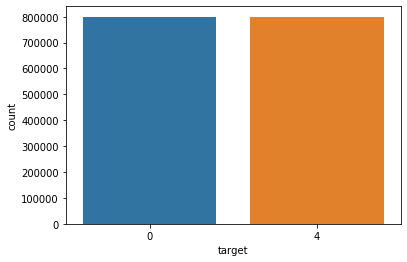

In [7]:
sns.countplot(x='target', data=df)

In [8]:
data = df[['text', 'target']]

In [9]:
data['target'] = data['target'].replace(4,1)

C:\Users\Anurag\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
data.target

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64

In [12]:
data_pos = data[data['target']==1]
data_neg = data[data['target']==0]

In [13]:
data_pos = data_pos.iloc[:int(250000)]
data_neg = data_neg.iloc[:int(250000)]

In [14]:
dataset = pd.concat([data_pos, data_neg])

In [15]:
dataset['text'] = dataset['text'].str.lower()
dataset['text'].tail()

249995    met someone today and wishes he'd had more tim...
249996                bah, too much water in coffee again. 
249997    lunch with anna&lt;3 then swimming maybe. blah...
249998    @blazinsquadnews oh no  i`m sorry for you. i h...
249999                                    a want ice cream 
Name: text, dtype: object

In [16]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [17]:
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [18]:
dataset.head()

,text,target
800000,love @health4uandpets u guys r best!!,1
800001,im meeting one besties tonight! cant wait!! - ...,1
800002,"@darealsunisakim thanks twitter add, sunisa! g...",1
800003,sick really cheap hurts much eat real food plu...,1
800004,@lovesbrooklyn2 effect everyone,1


In [19]:
dataset['text'] = dataset['text'].str.replace('[^\w\s]','')

C:\Users\Anurag\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [20]:
dataset.head()

,text,target
800000,love health4uandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn2 effect everyone,1


In [21]:
dataset['text'] = dataset['text'].str.replace(r'\s+(.)\1+\b','').str.strip()

C:\Users\Anurag\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [22]:
dataset.head()

,text,target
800000,love health4uandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn2 effect everyone,1


In [23]:
dataset['text'] = dataset['text'].replace(to_replace=r'^https?:\/\/.*[\r\n]*',value='',regex=True)

In [24]:
dataset.tail()

,text,target
249995,met someone today wishes hed time talk her fb,0
249996,bah much water coffee again,0
249997,lunch annalt3 swimming maybe blahhh headaches,0
249998,blazinsquadnews oh im sorry you hope get bette...,0
249999,want ice cream,0


In [25]:
dataset['text'] = dataset['text'].str.replace('\d+', '', regex=True)

In [26]:
dataset.tail()

,text,target
249995,met someone today wishes hed time talk her fb,0
249996,bah much water coffee again,0
249997,lunch annalt swimming maybe blahhh headaches,0
249998,blazinsquadnews oh im sorry you hope get bette...,0
249999,want ice cream,0


In [27]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [28]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [29]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Anurag\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [31]:
dataset.head()

,text,target
800000,"[love, healthuandpets, u, guys, r, best]",1
800001,"[im, meeting, one, besties, tonight, cant, wai...",1
800002,"[darealsunisakim, thanks, twitter, add, sunisa...",1
800003,"[sick, really, cheap, hurts, much, eat, real, ...",1
800004,"[lovesbrooklyn, effect, everyone]",1


In [32]:
dataset['text'] =  dataset['text'].apply(lambda x: ' '.join([str(elem) for elem in x]))

In [33]:
dataset.head()

,text,target
800000,love healthuandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl ...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn effect everyone,1


In [34]:
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [35]:
X=dataset.text
y=dataset.target

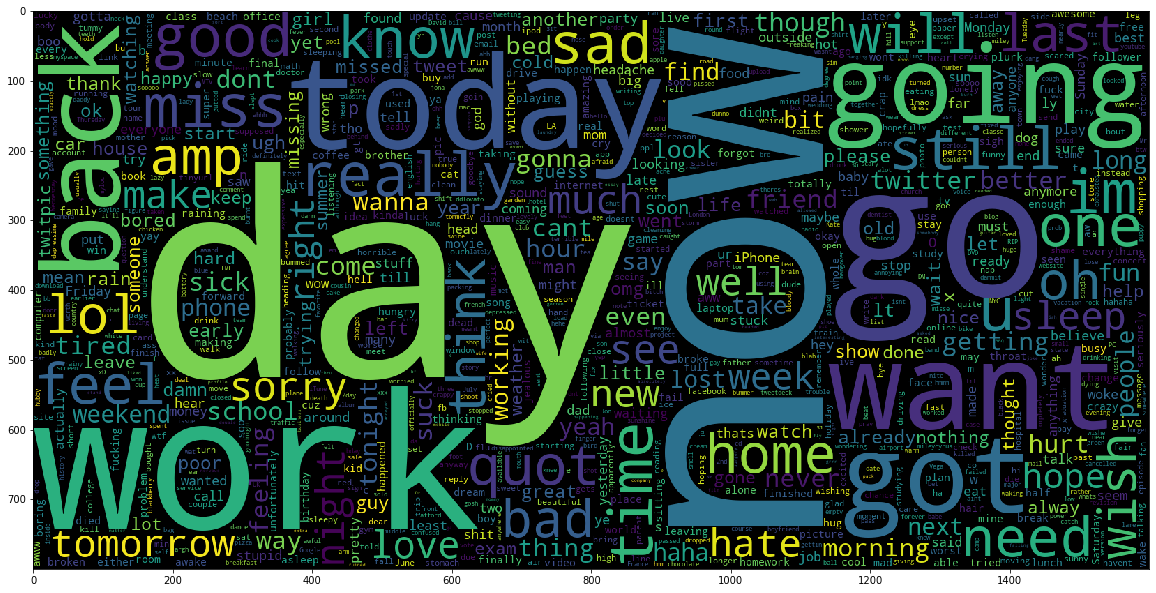

In [31]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

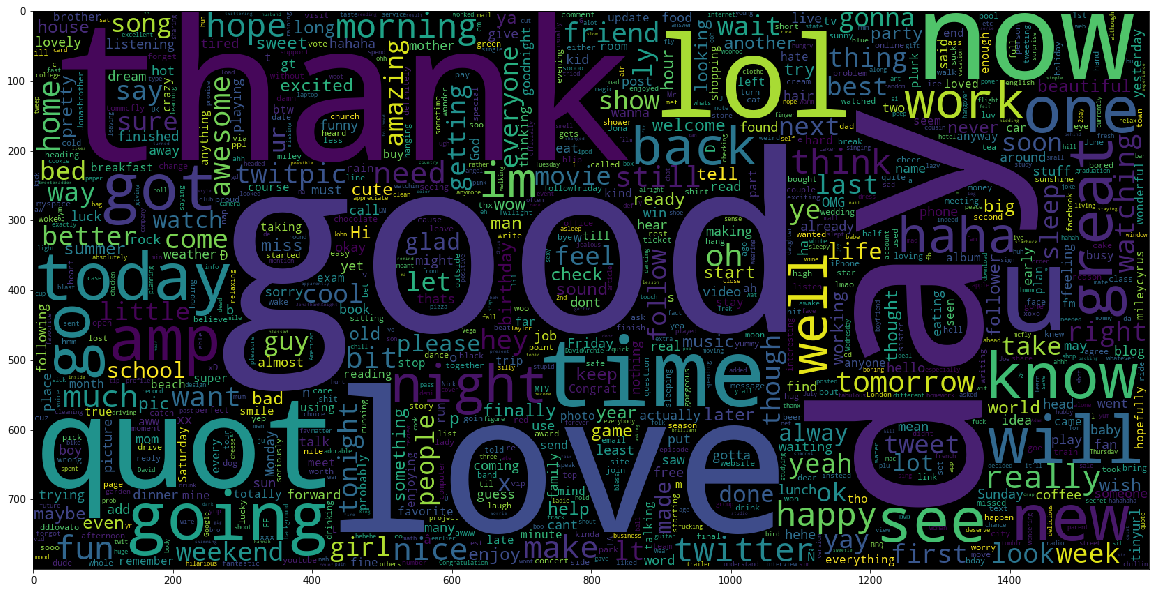

In [32]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [33]:
from wordcloud import ImageColorGenerator
import urllib
import requests

Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

<IPython.core.display.Javascript object>

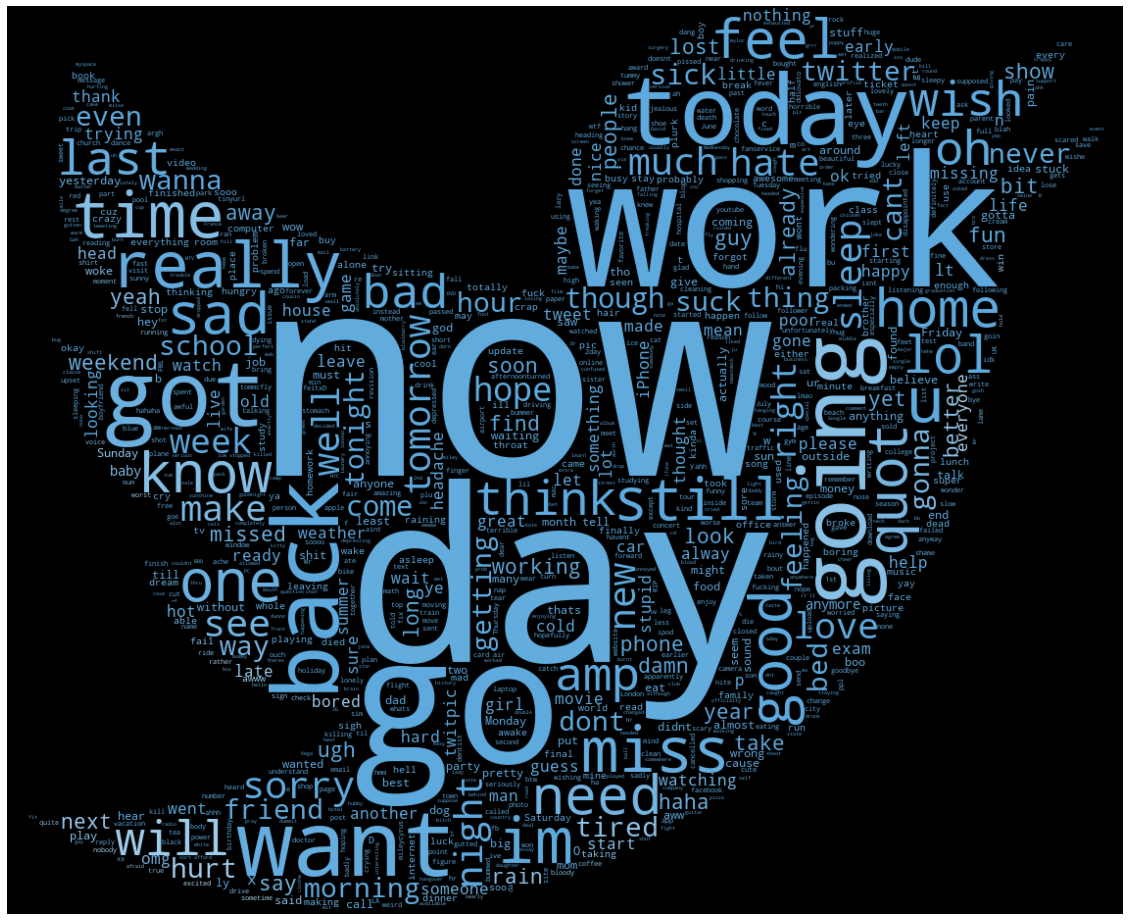

In [34]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(background_color='black', max_words = 1000 , width = 1600 , height = 800,
               collocations=False, mask=Mask).generate(" ".join(data_neg))

plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>

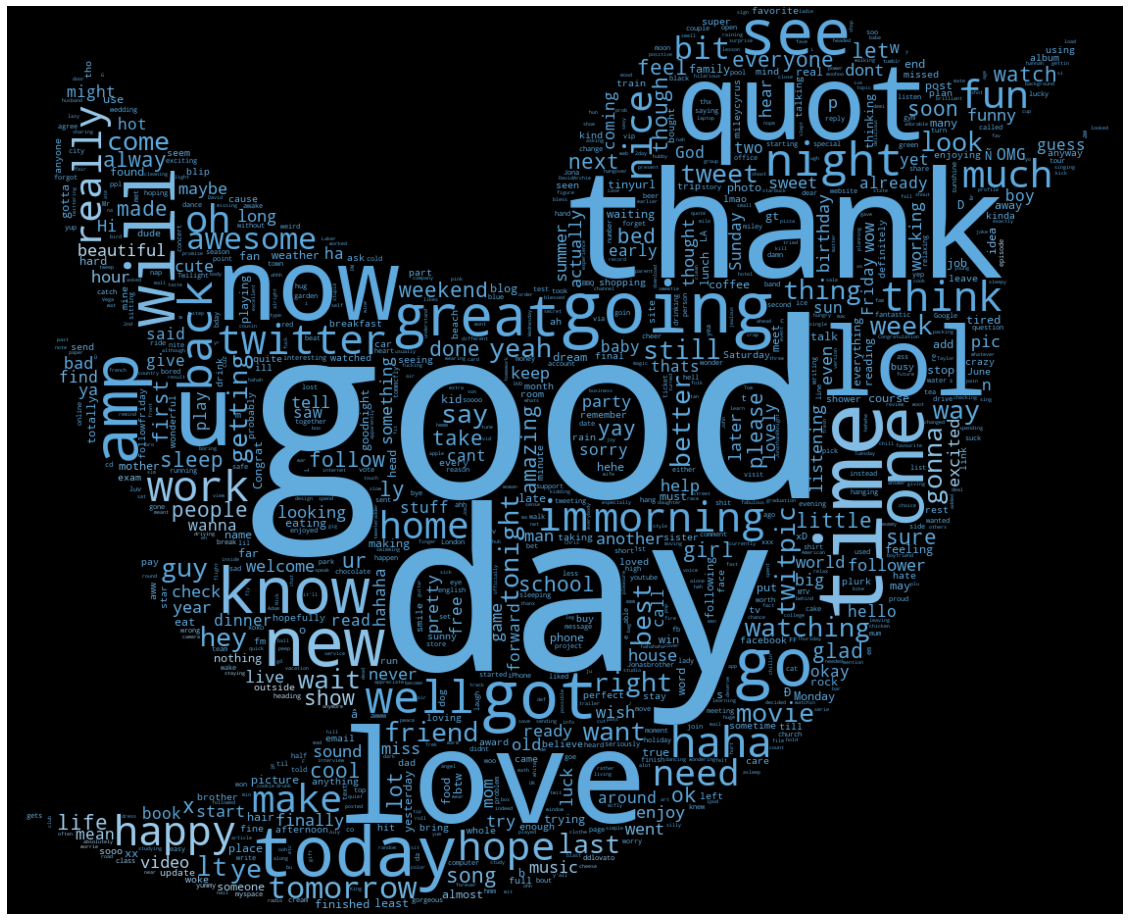

In [35]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

wc = WordCloud(background_color='black', max_words = 1000 , width = 1600 , height = 800,
               collocations=False, mask=Mask).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [36]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26)

In [37]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

C:\Users\Anurag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


In [38]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [39]:
X_train

<475000x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 5151073 stored elements in Compressed Sparse Row format>

In [40]:
X_test

<25000x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 247531 stored elements in Compressed Sparse Row format>

In [41]:
from sklearn.metrics import f1_score

In [42]:
Log_reg = LogisticRegression(random_state=0, solver='lbfgs', C=2, max_iter=1000)

In [44]:
y_train.head()

901786    1
951480    1
185709    0
56134     0
864477    1
Name: target, dtype: int64

In [45]:
Log_reg.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=1000, random_state=0)

In [46]:
Log_pred = Log_reg.predict(X_test)

In [47]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78     12440
           1       0.78      0.79      0.79     12560

    accuracy                           0.79     25000
   macro avg       0.79      0.79      0.79     25000
weighted avg       0.79      0.79      0.79     25000



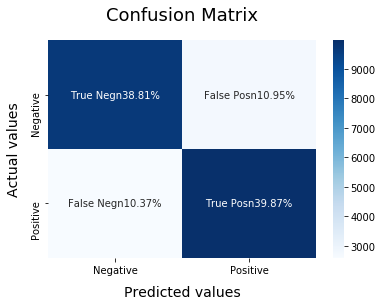

In [48]:
model_Evaluate(Log_reg)

In [49]:
print('F1 Score: ', f1_score(y_test, Log_pred))

F1 Score:  0.7890757965565011


In [52]:
Log_pred[:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [53]:
y_test.head()

170276     0
233811     0
173207     0
4159       0
1032049    1
Name: target, dtype: int64

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     12440
           1       0.77      0.79      0.78     12560

    accuracy                           0.78     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.78      0.78      0.78     25000



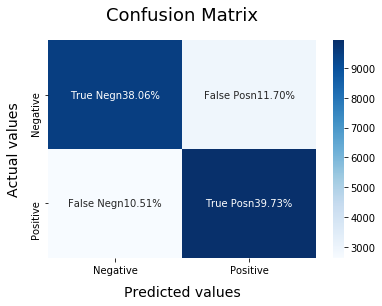

In [54]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
BNB_pred = BNBmodel.predict(X_test)

In [55]:
print('F1 Score: ', f1_score(y_test, BNB_pred))

F1 Score:  0.7814934298528602


              precision    recall  f1-score   support

           0       0.77      0.77      0.77     12440
           1       0.78      0.78      0.78     12560

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.77      0.77      0.77     25000



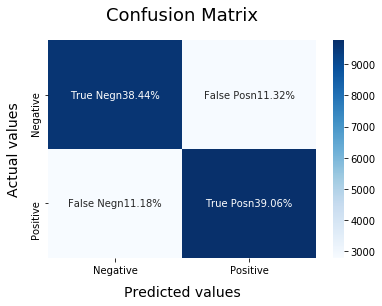

In [56]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
SVC_pred = SVCmodel.predict(X_test)

In [57]:
print('F1 Score: ', f1_score(y_test, SVC_pred))

F1 Score:  0.7763377594020832


In [58]:
text1 = 'I am happy today!!'

In [59]:
text1 = vectoriser.transform([text1])

In [60]:
text1

<1x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [61]:
Log_reg.predict(text1)

array([1], dtype=int64)

# Experimental

In [62]:
import re

In [63]:
results = {0: 'negative', 1:'Positive'}

In [64]:
ex_text = '''A smile never goes out of style.      https://anurag.com !!!!!!!! 7777777'''

In [65]:
ex_text = re.sub(r'http\S+','', ex_text)
print(ex_text)

A smile never goes out of style.       !!!!!!!! 7777777


In [66]:
ex_text = ' '.join([word for word in ex_text.split() if word not in (stop_words)])
print(ex_text)

A smile never goes style. !!!!!!!! 7777777


In [67]:
ex_text = re.sub(r'[^\w\s]','', ex_text)
print(ex_text)

A smile never goes style  7777777


In [68]:
ex_text = re.sub(r'\s+(.)\1+\b','', ex_text).strip()
print(ex_text)

A smile never goes style


In [69]:
ex_text = ex_text.replace('\d+','')
print(ex_text)

A smile never goes style


In [70]:
ex_text = vectoriser.transform([ex_text])

In [71]:
print(results[Log_reg.predict(ex_text)[0]])

Positive


In [72]:
with open('vectorizer.pk', 'wb') as fin:
    pickle.dump(vectoriser, fin)

<IPython.core.display.Javascript object>

In [73]:
with open('model.pkl', 'wb') as md:
    pickle.dump(Log_reg, md)

<IPython.core.display.Javascript object>

# The End